In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("../data/csv/title_genres_v2.csv", delimiter=",")

In [27]:
df.shape

(30586, 55)

In [28]:
df.columns

Index(['title', 'action', 'drama', 'fantasy', 'mystery', 'adventure',
       'excessive violence', 'horror', 'psychological drama',
       'supernatural drama', 'military', 'shounen', 'super power',
       'psychological', 'supernatural', 'thriller', 'crime fiction', 'police',
       'suspense', 'comedy', 'fighting-shounen', 'ganbatte', 'school',
       'demons', 'historical', 'parody', 'romance', 'game', 'seinen',
       'ghost stories', 'martial arts', 'slice of life', 'sentimental drama',
       'music', 'sports', 'ecchi', 'harem', 'mecha', 'vampire', 'gourmet',
       'avant garde', 'samurai', 'shoujo', 'nonsense-comedy', 'boys love',
       'girls love', 'kids', 'indefinite', 'josei', 'space', 'cars', 'hentai',
       'magical_girl', 'science fiction', 'erotic'],
      dtype='object')

In [29]:
df2 = pd.read_csv("../data/csv/title_single_valued_attrs.csv", delimiter=',')

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df2.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

In [31]:
len(df2.columns)

45

In [32]:
result = pd.concat([df, df2], axis=1)

In [33]:
result = result.loc[:,~result.columns.duplicated()]

In [34]:
result.head(5)

,title,action,drama,fantasy,mystery,adventure,excessive violence,horror,psychological drama,supernatural drama,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,1,1,1,1,1,1,1,1,1,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,0,1,1,1,0,0,1,1,1,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,1,1,1,0,1,0,0,0,0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,1,1,1,0,1,1,1,0,0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,1,0,1,0,1,0,0,0,0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [35]:
len(result)

30586

In [36]:
result.loc[:, "mean_score_anilist"] = result["mean_score_anilist"].apply(lambda x: x*10)

In [37]:
result["mean_score_anilist"]

0        8.5
1        8.4
2        7.9
3        8.5
4        9.0
        ... 
30581    NaN
30582    NaN
30583    NaN
30584    NaN
30585    NaN
Name: mean_score_anilist, Length: 30586, dtype: float64

In [38]:
# rename column to plot better
result.rename(columns={'excessive violence': 'violence'}, inplace=True)

In [39]:
genres = result.columns[1:55]
genres

Index(['action', 'drama', 'fantasy', 'mystery', 'adventure', 'violence',
       'horror', 'psychological drama', 'supernatural drama', 'military',
       'shounen', 'super power', 'psychological', 'supernatural', 'thriller',
       'crime fiction', 'police', 'suspense', 'comedy', 'fighting-shounen',
       'ganbatte', 'school', 'demons', 'historical', 'parody', 'romance',
       'game', 'seinen', 'ghost stories', 'martial arts', 'slice of life',
       'sentimental drama', 'music', 'sports', 'ecchi', 'harem', 'mecha',
       'vampire', 'gourmet', 'avant garde', 'samurai', 'shoujo',
       'nonsense-comedy', 'boys love', 'girls love', 'kids', 'indefinite',
       'josei', 'space', 'cars', 'hentai', 'magical_girl', 'science fiction',
       'erotic'],
      dtype='object')

# Box plot

## Genres

### Mean Score

In [40]:
len(genres)

54

In [41]:
def number_anime_by_genre(genre):
    return len(result[result[genre] == 1])

In [42]:
genre_by_num_anime = sorted(genres, key=number_anime_by_genre)

In [43]:
genre_by_num_anime.remove("supernatural drama")
genre_by_num_anime.remove("psychological drama")
genre_by_num_anime.remove("ganbatte")

In [44]:
essential_genre = genre_by_num_anime[21:]

In [45]:
len(essential_genre)

30

In [46]:
def median_score_by_genre(genre, score):
    return result[result[genre] == 1][score].dropna().median()

In [47]:
import matplotlib.gridspec as gridspec

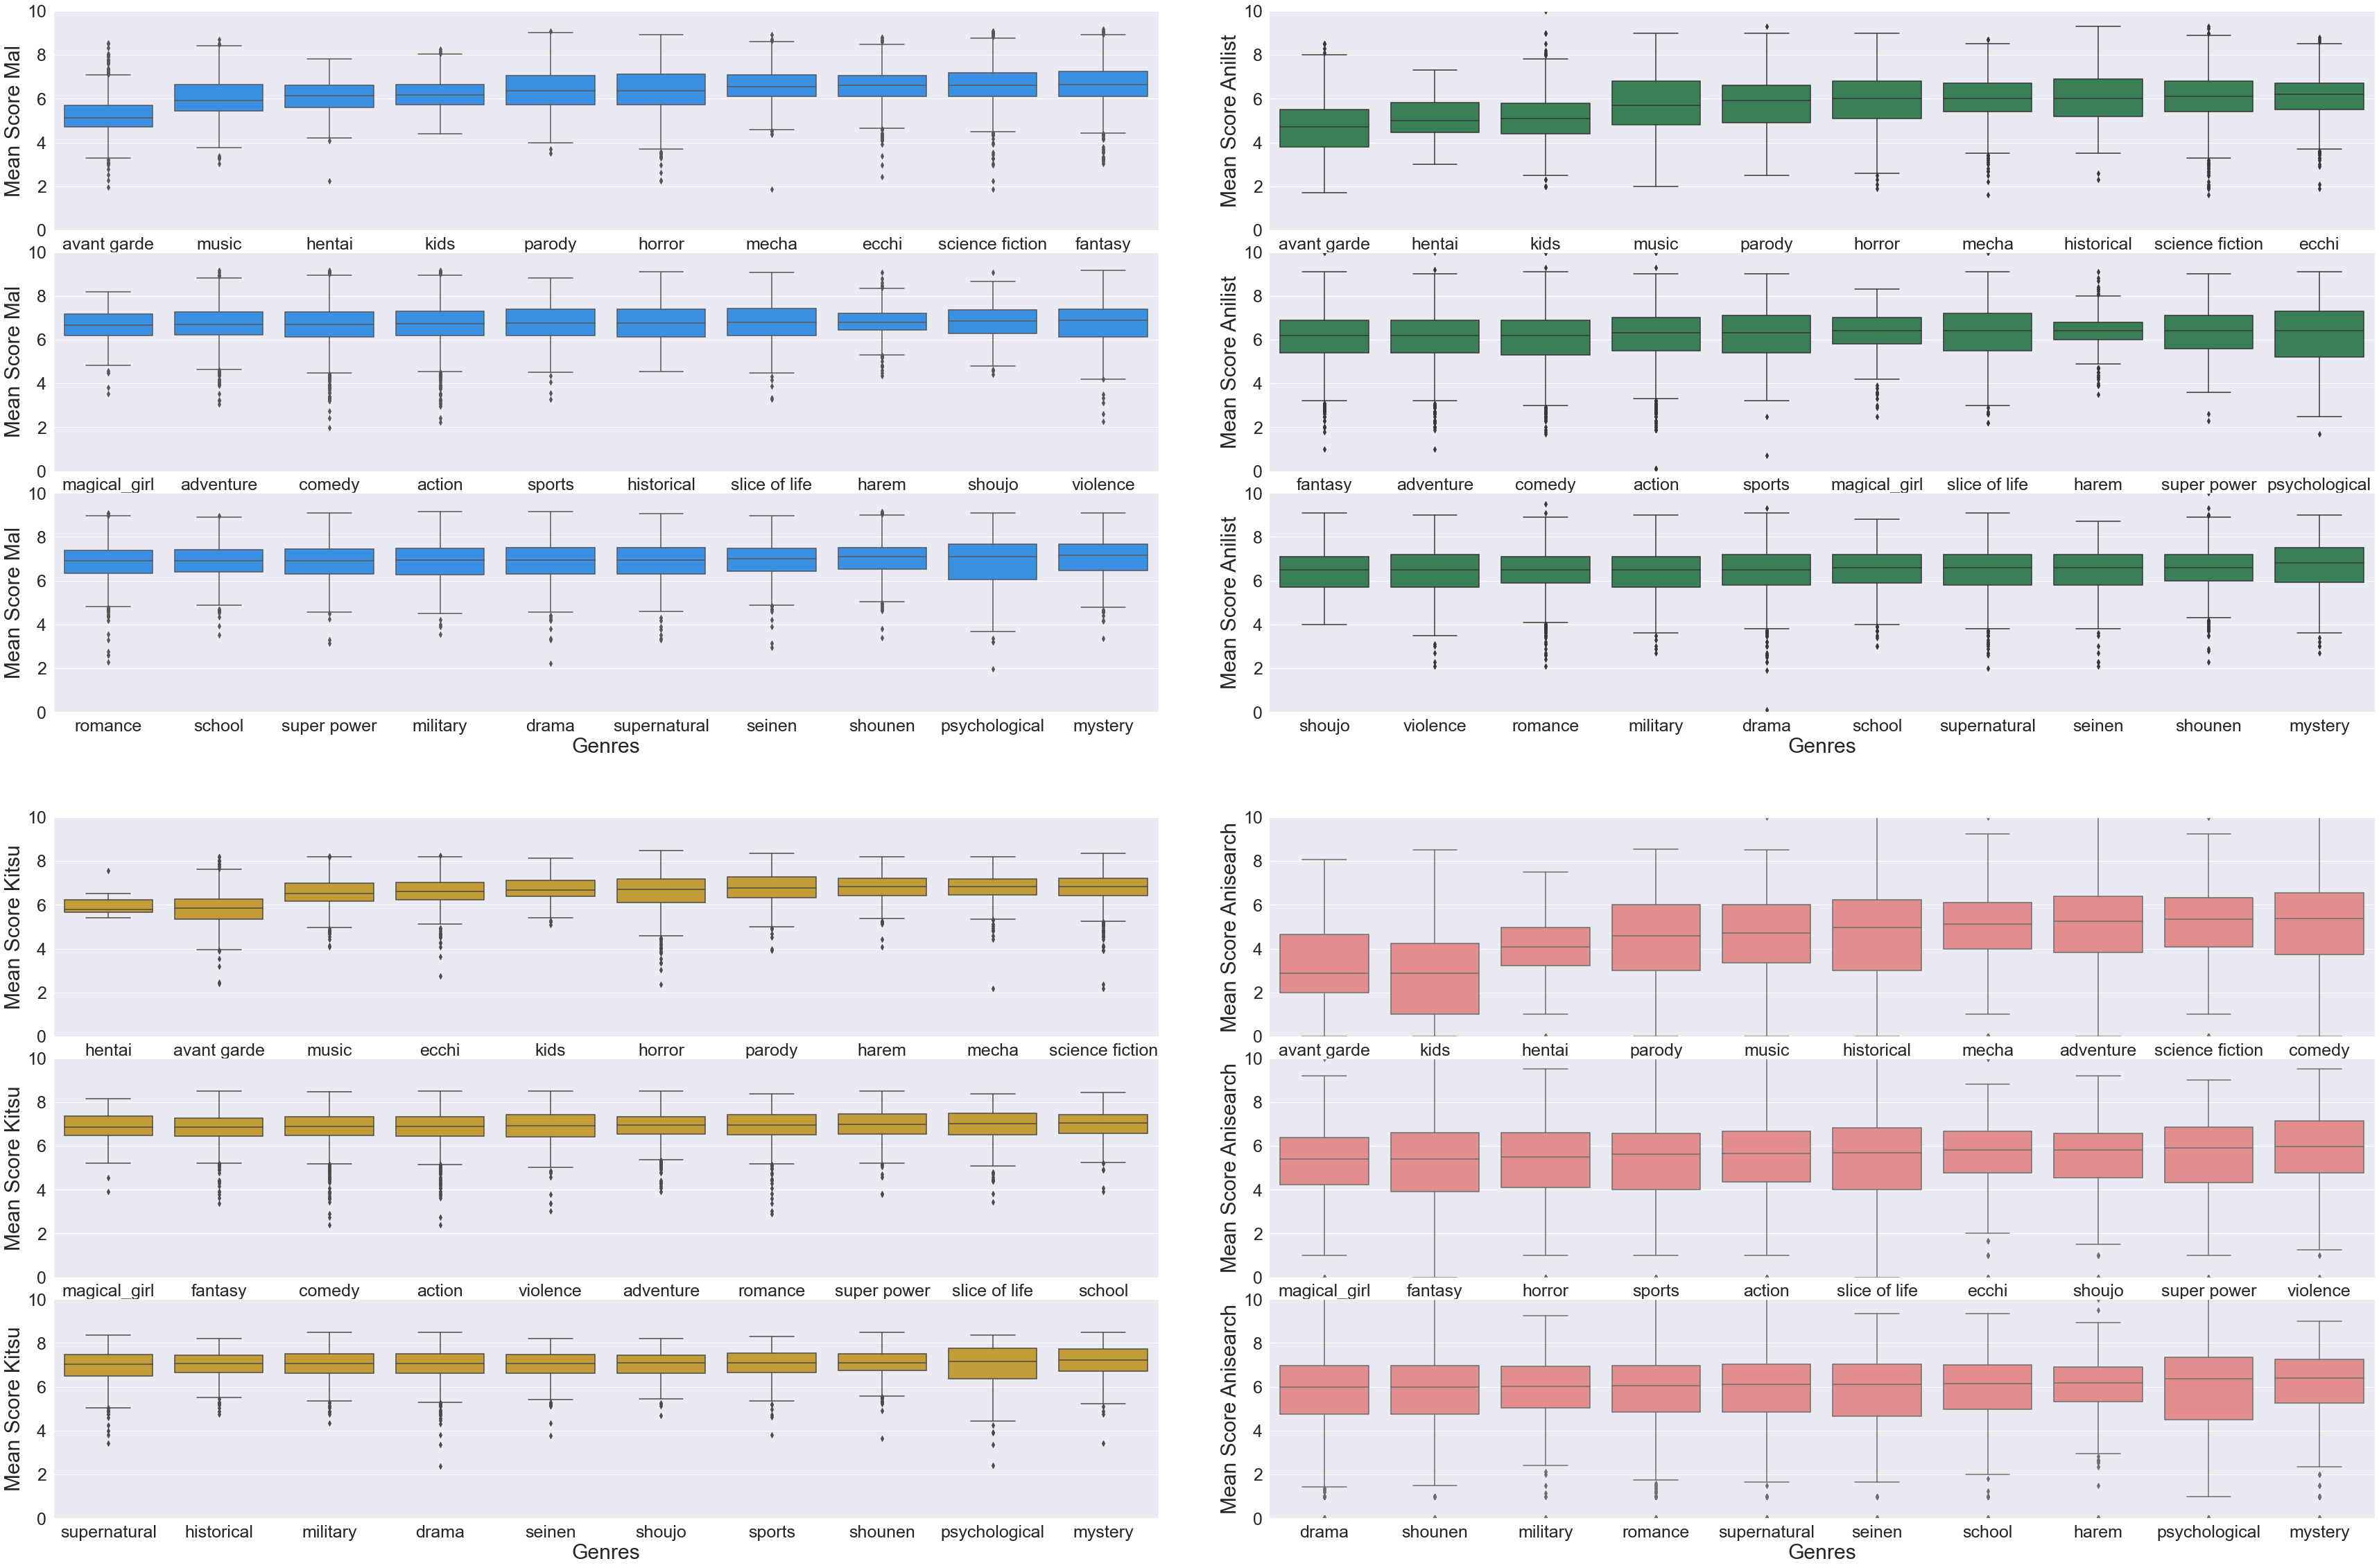

In [49]:
sns.set_theme()
sns.set_style("darkgrid")
websites = ["mal", "anilist", "kitsu", "anisearch"]
colors = ["dodgerblue", "seagreen", "goldenrod", "lightcoral"]
fig = plt.figure(figsize=(60, 40))
outer = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.15)

for idx, (website, color) in enumerate(zip(websites, colors)):
    axs = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[idx], wspace=0.1, hspace=0.1)
    anime_batch = []
    genres_batch = []
    score = "mean_score_" + website
    essential_genre.sort(key=lambda genre: median_score_by_genre(genre, score))

    for idx, genre in enumerate(essential_genre):
        anime = result[result[genre] == 1]
        anime_batch.append(anime[score].dropna())
        genres_batch.append(genre)
        row = idx // 10
        if len(genres_batch) == 10:
            ax = plt.Subplot(fig, axs[row])
            sns.boxplot(data=anime_batch, ax=ax, color=color)
            ax.set(ylim=(0, 10))
            ax.set_xticklabels(genres_batch, fontsize=25)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            ax.set_xlabel("Genres", fontsize=30)
            ax.set_ylabel("Mean Score " + website.capitalize(), fontsize=30)
            fig.add_subplot(ax)
            genres_batch = []
            anime_batch = []

filename = "Plots/box_plot_score_by_genre_all_sites"
plt.savefig(filename)

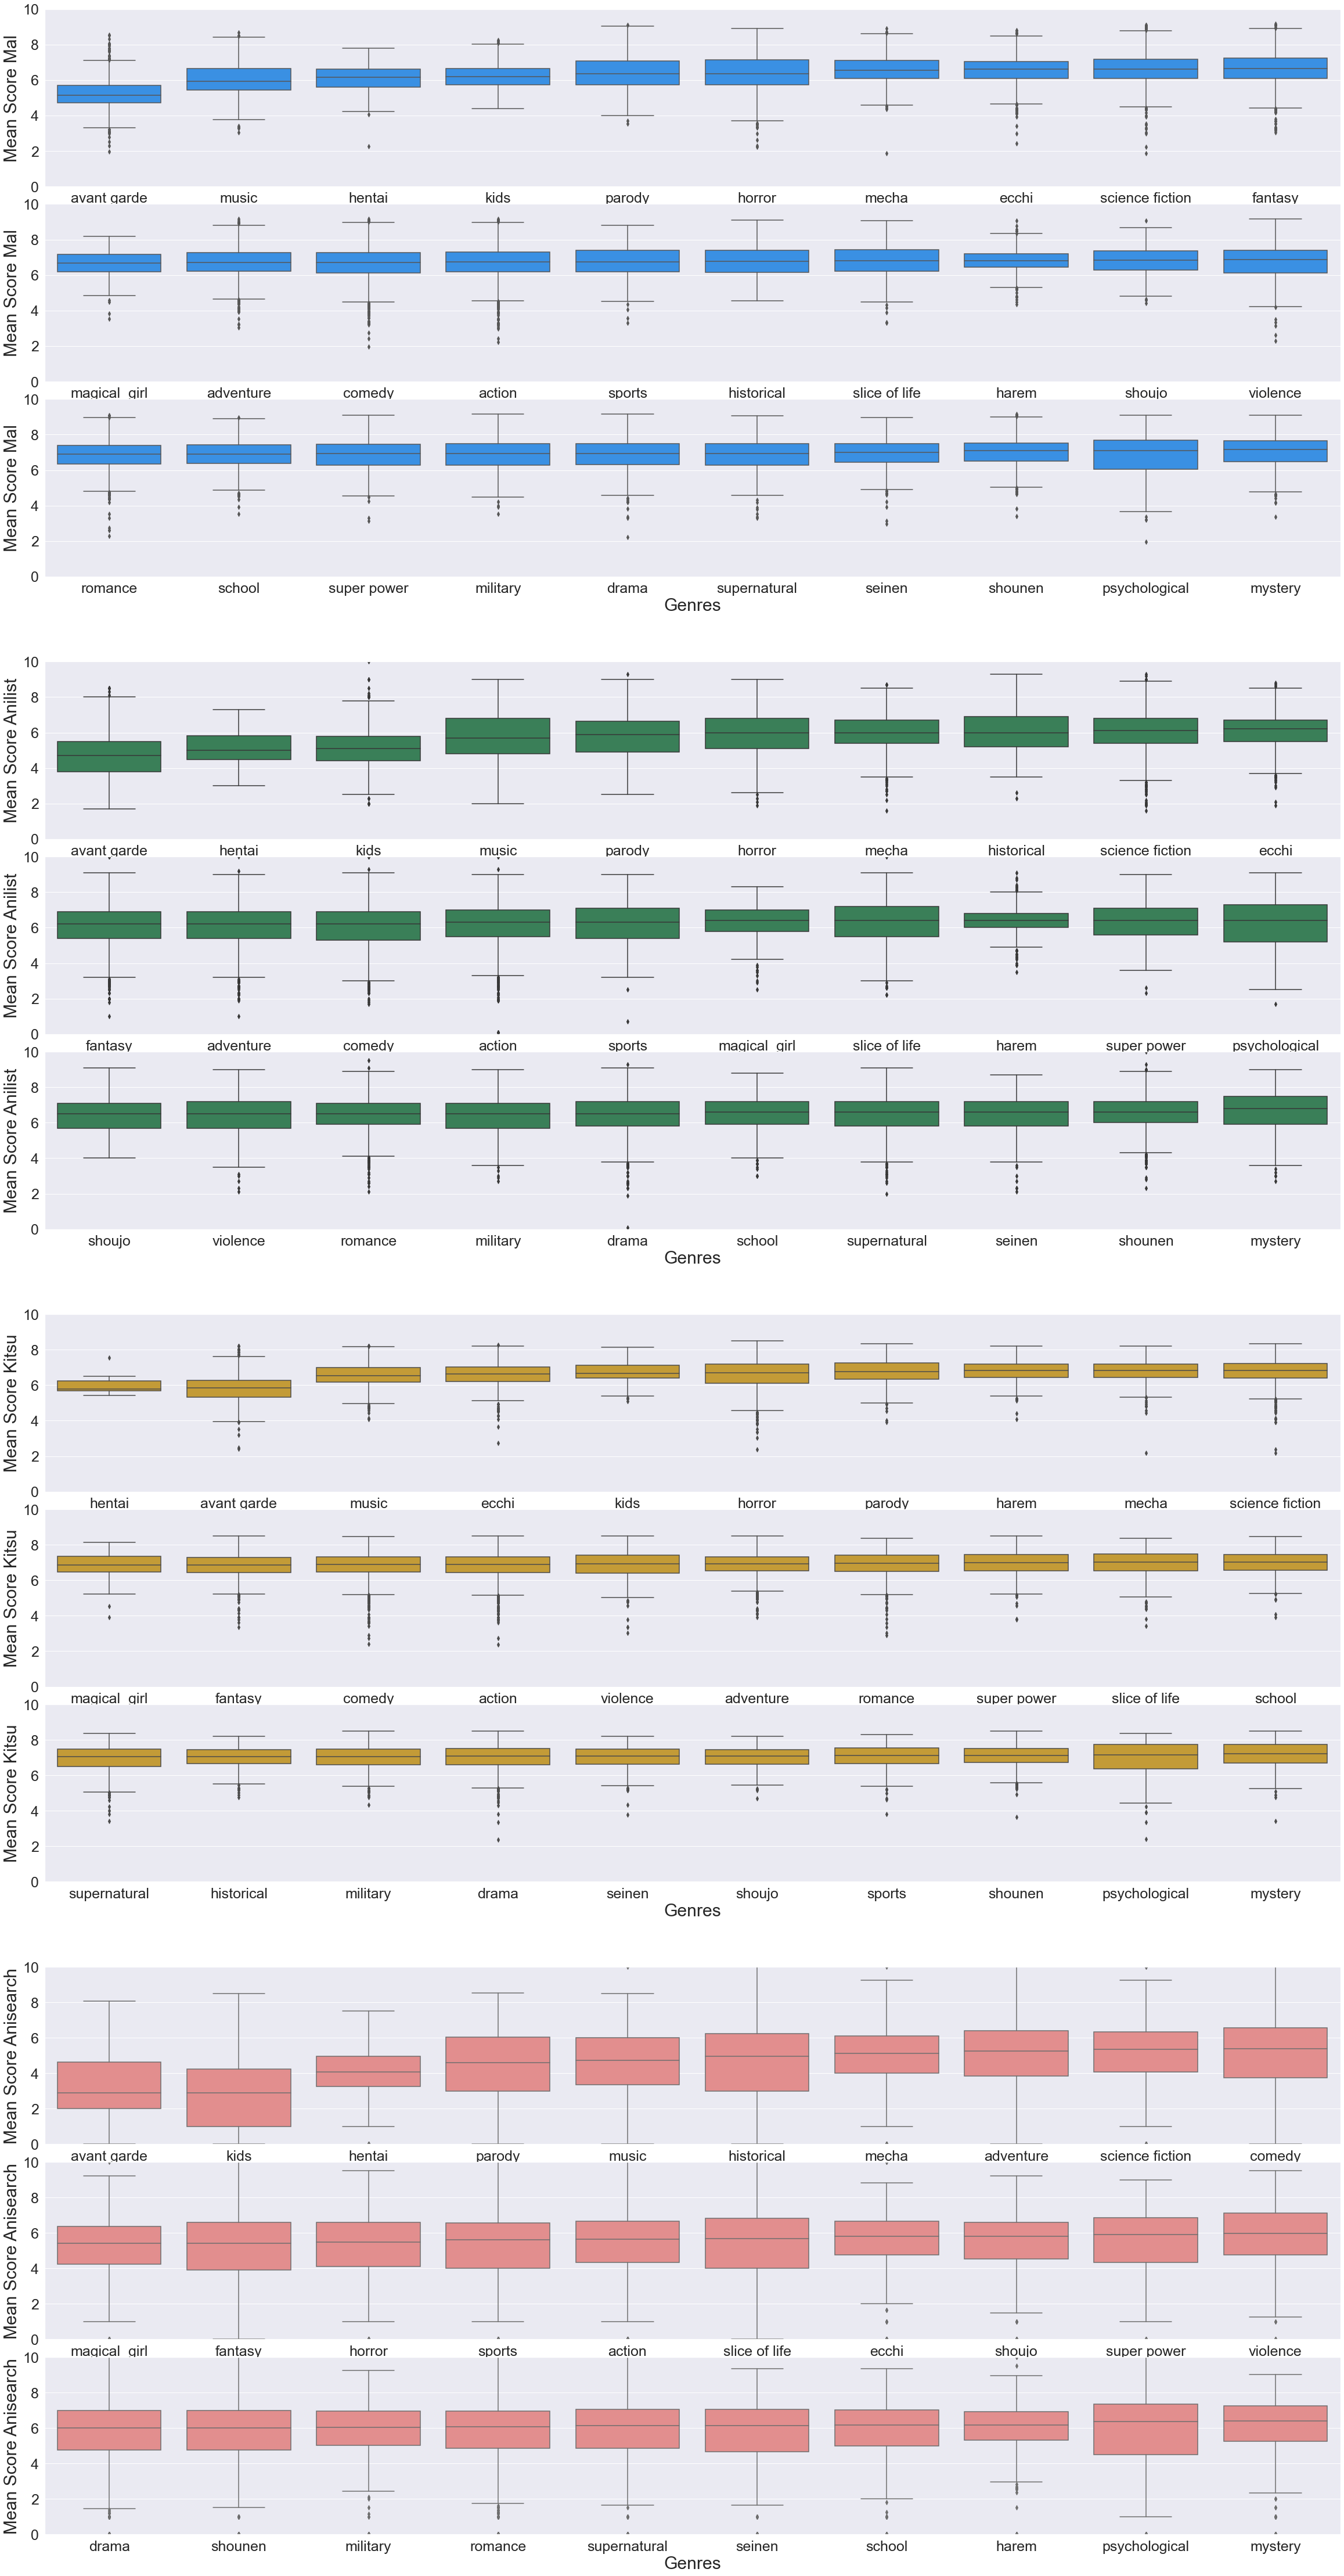

In [50]:
sns.set_theme()
sns.set_style("darkgrid")
websites = ["mal", "anilist", "kitsu", "anisearch"]
colors = ["dodgerblue", "seagreen", "goldenrod", "lightcoral"]
fig = plt.figure(figsize=(40, 80))
outer = gridspec.GridSpec(4, 1, wspace=0.1, hspace=0.15)

for idx, (website, color) in enumerate(zip(websites, colors)):
    axs = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[idx], wspace=0.1, hspace=0.1)
    anime_batch = []
    genres_batch = []
    score = "mean_score_" + website
    essential_genre.sort(key=lambda genre: median_score_by_genre(genre, score))

    for idx, genre in enumerate(essential_genre):
        anime = result[result[genre] == 1]
        anime_batch.append(anime[score].dropna())
        genres_batch.append(genre)
        row = idx // 10
        if len(genres_batch) == 10:
            ax = plt.Subplot(fig, axs[row])
            sns.boxplot(data=anime_batch, ax=ax, color=color)
            ax.set(ylim=(0, 10))
            ax.set_xticklabels(genres_batch, fontsize=25)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            ax.set_xlabel("Genres", fontsize=30)
            ax.set_ylabel("Mean Score " + website.capitalize(), fontsize=30)
            fig.add_subplot(ax)
            genres_batch = []
            anime_batch = []

filename = "Plots/box_plot_score_by_genre_all_sites_v2.png"
plt.savefig(filename)

In [51]:
def box_plot_genres_score(website, genres, color):
    sns.set_theme()
    sns.set_style("darkgrid")
    score = "mean_score_" + website
    NUM_ROWS = 6
    NUM_COLS = 9
    fig, axs = plt.subplots(nrows=NUM_ROWS, figsize=(35, 50))
    anime_batch = []
    genres_batch = []
    for idx, genre in enumerate(genres):
        anime = result[result[genre] == 1]
        anime_batch.append(anime[score].dropna())
        genres_batch.append(genre)
        row = idx // NUM_COLS
        if len(genres_batch) == NUM_COLS:
            ax = sns.boxplot(data=anime_batch, ax=axs[row], color=color)
            ax.set(ylim=(0, 10))
            ax.set_xticklabels(genres_batch)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            ax.set_xlabel("Genres", fontsize=30)
            ax.set_ylabel("Mean Score " + website.capitalize(), fontsize=30)
            genres_batch = []
            anime_batch = []
    filename = "Plots/box_plot_score_" + website + "_by_genre"
    plt.savefig(filename)

In [52]:
def median_score_by_genre_mal(genre):
    return result[result[genre] == 1]["mean_score_mal"].dropna().median()

In [53]:
genres = list(genres)

In [54]:
mal_genres = sorted(genres, key=median_score_by_genre_mal)

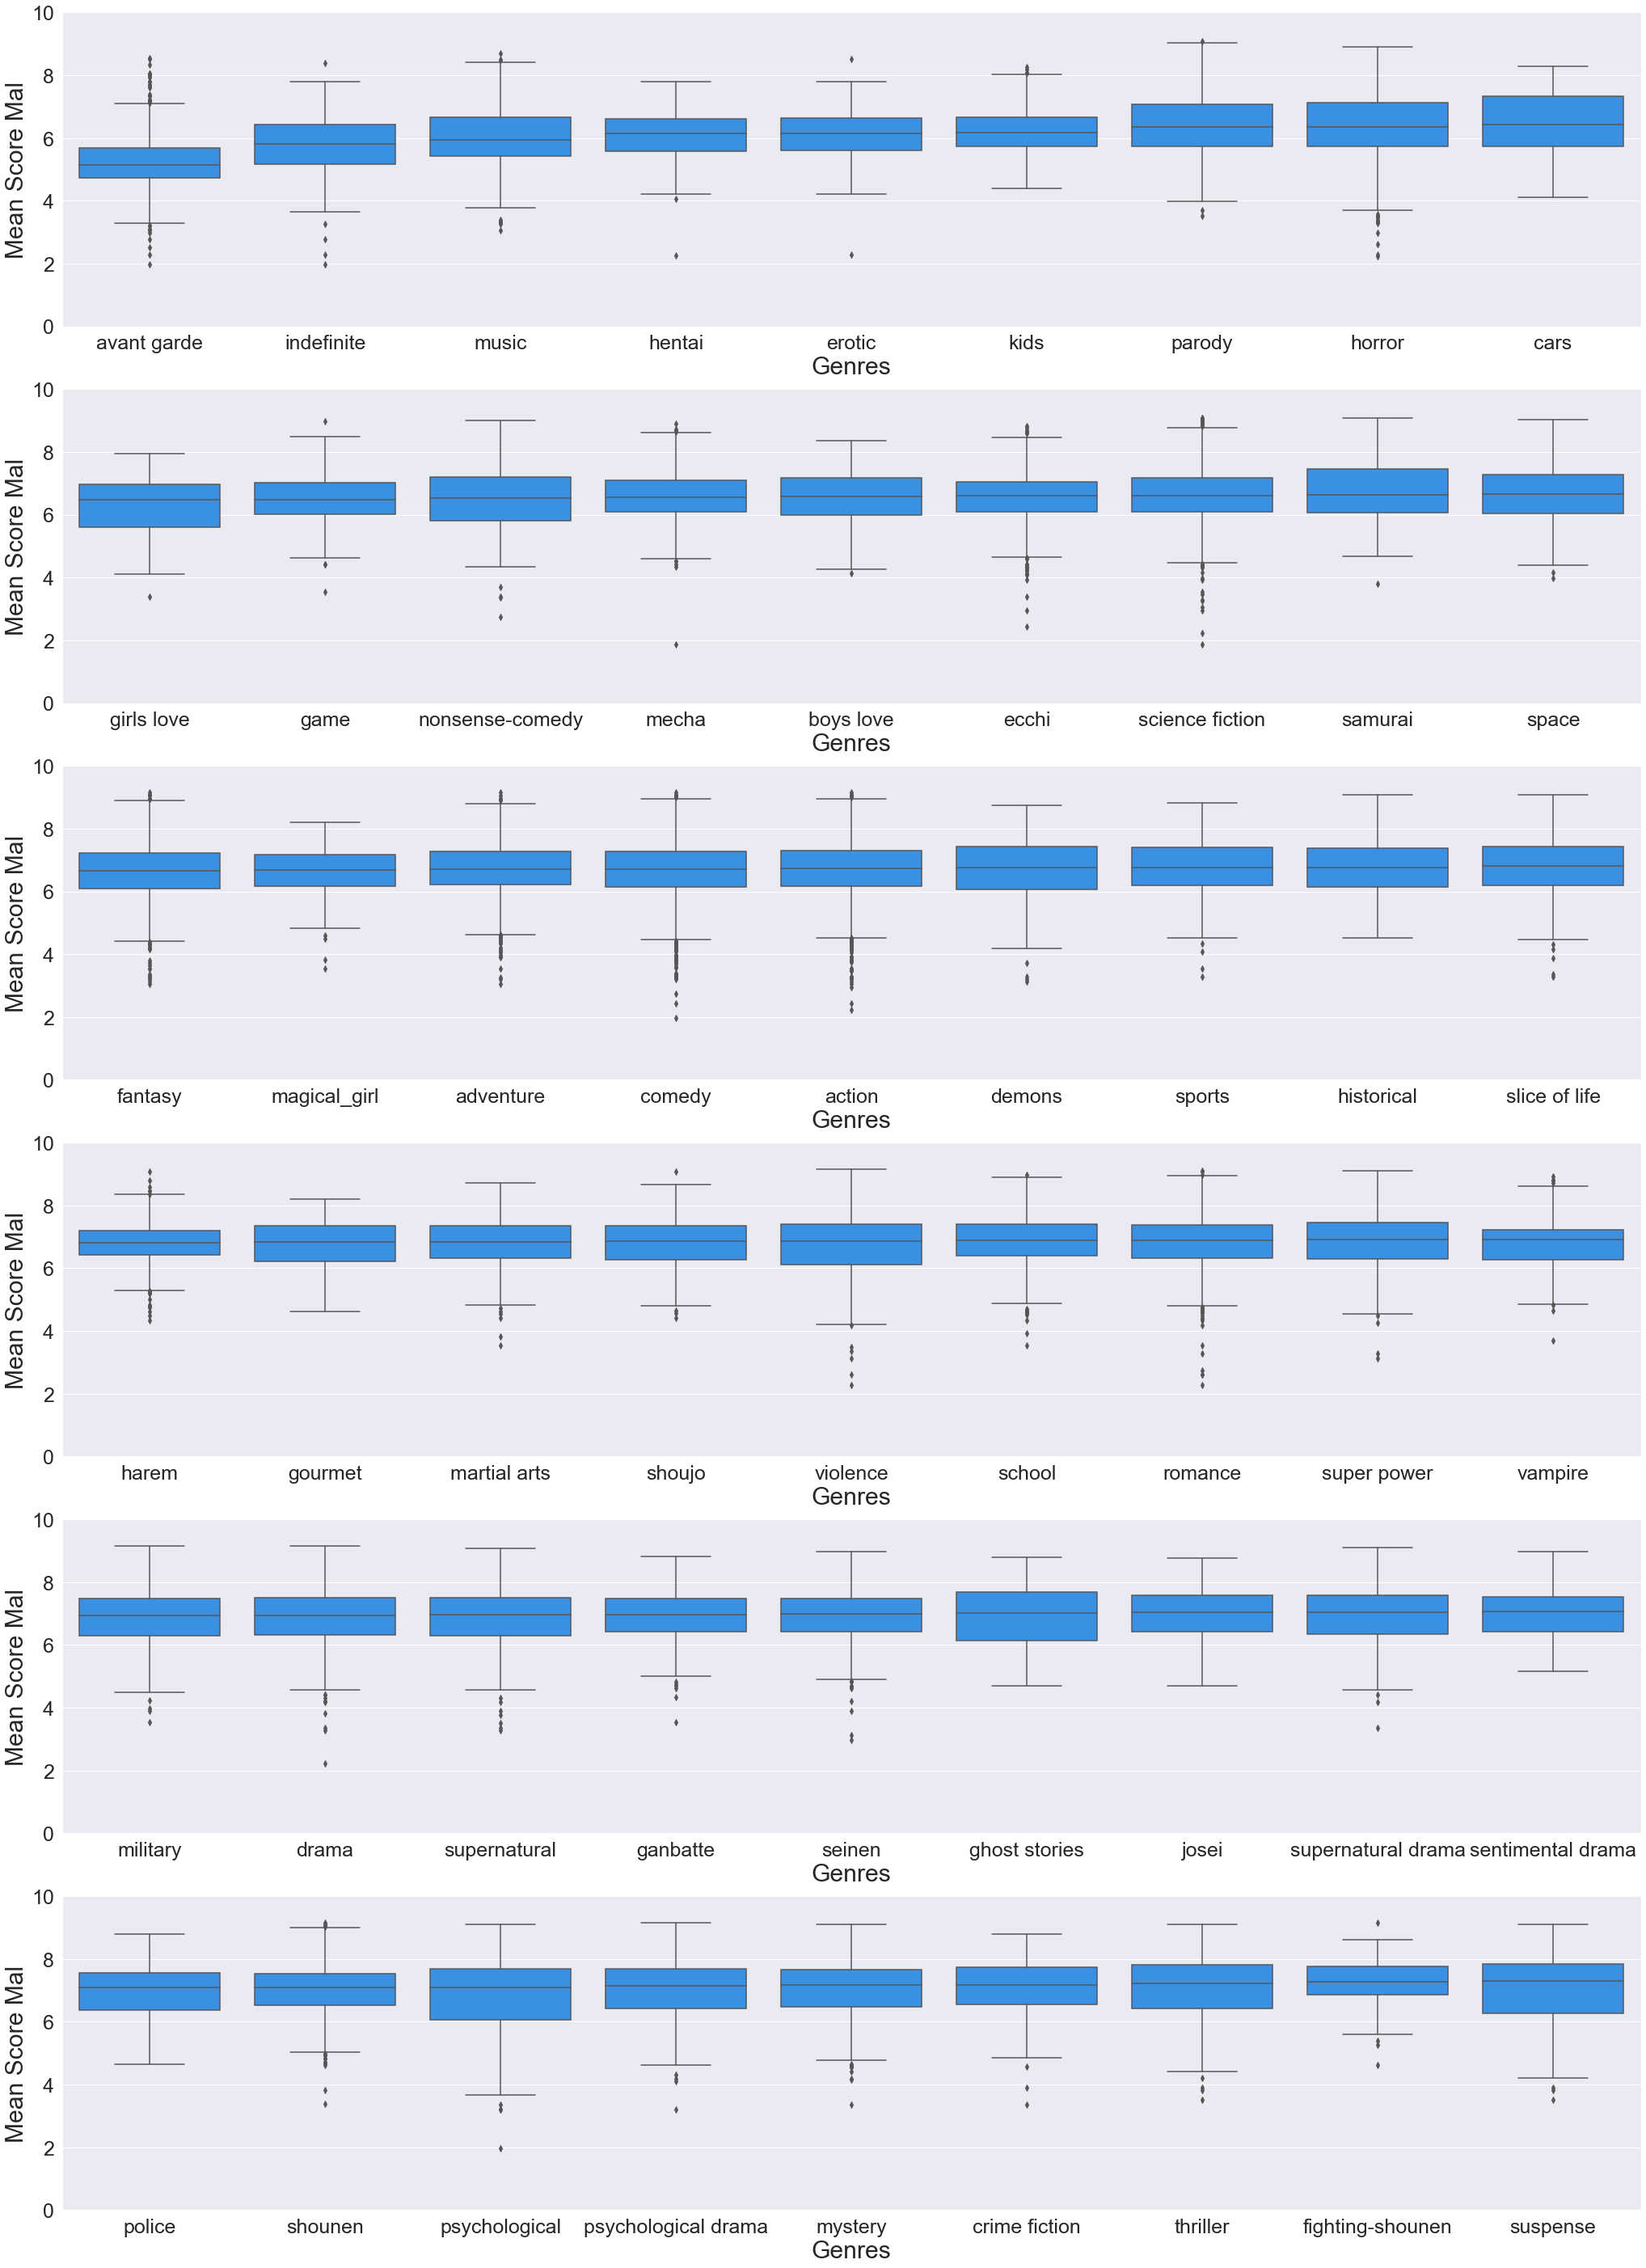

In [55]:
box_plot_genres_score("mal", mal_genres, color="dodgerblue")

In [56]:
def median_score_by_genre_anilist(genre):
    return result[result[genre] == 1]["mean_score_anilist"].median()

In [57]:
genres_anilist = sorted(genres, key=median_score_by_genre_anilist)

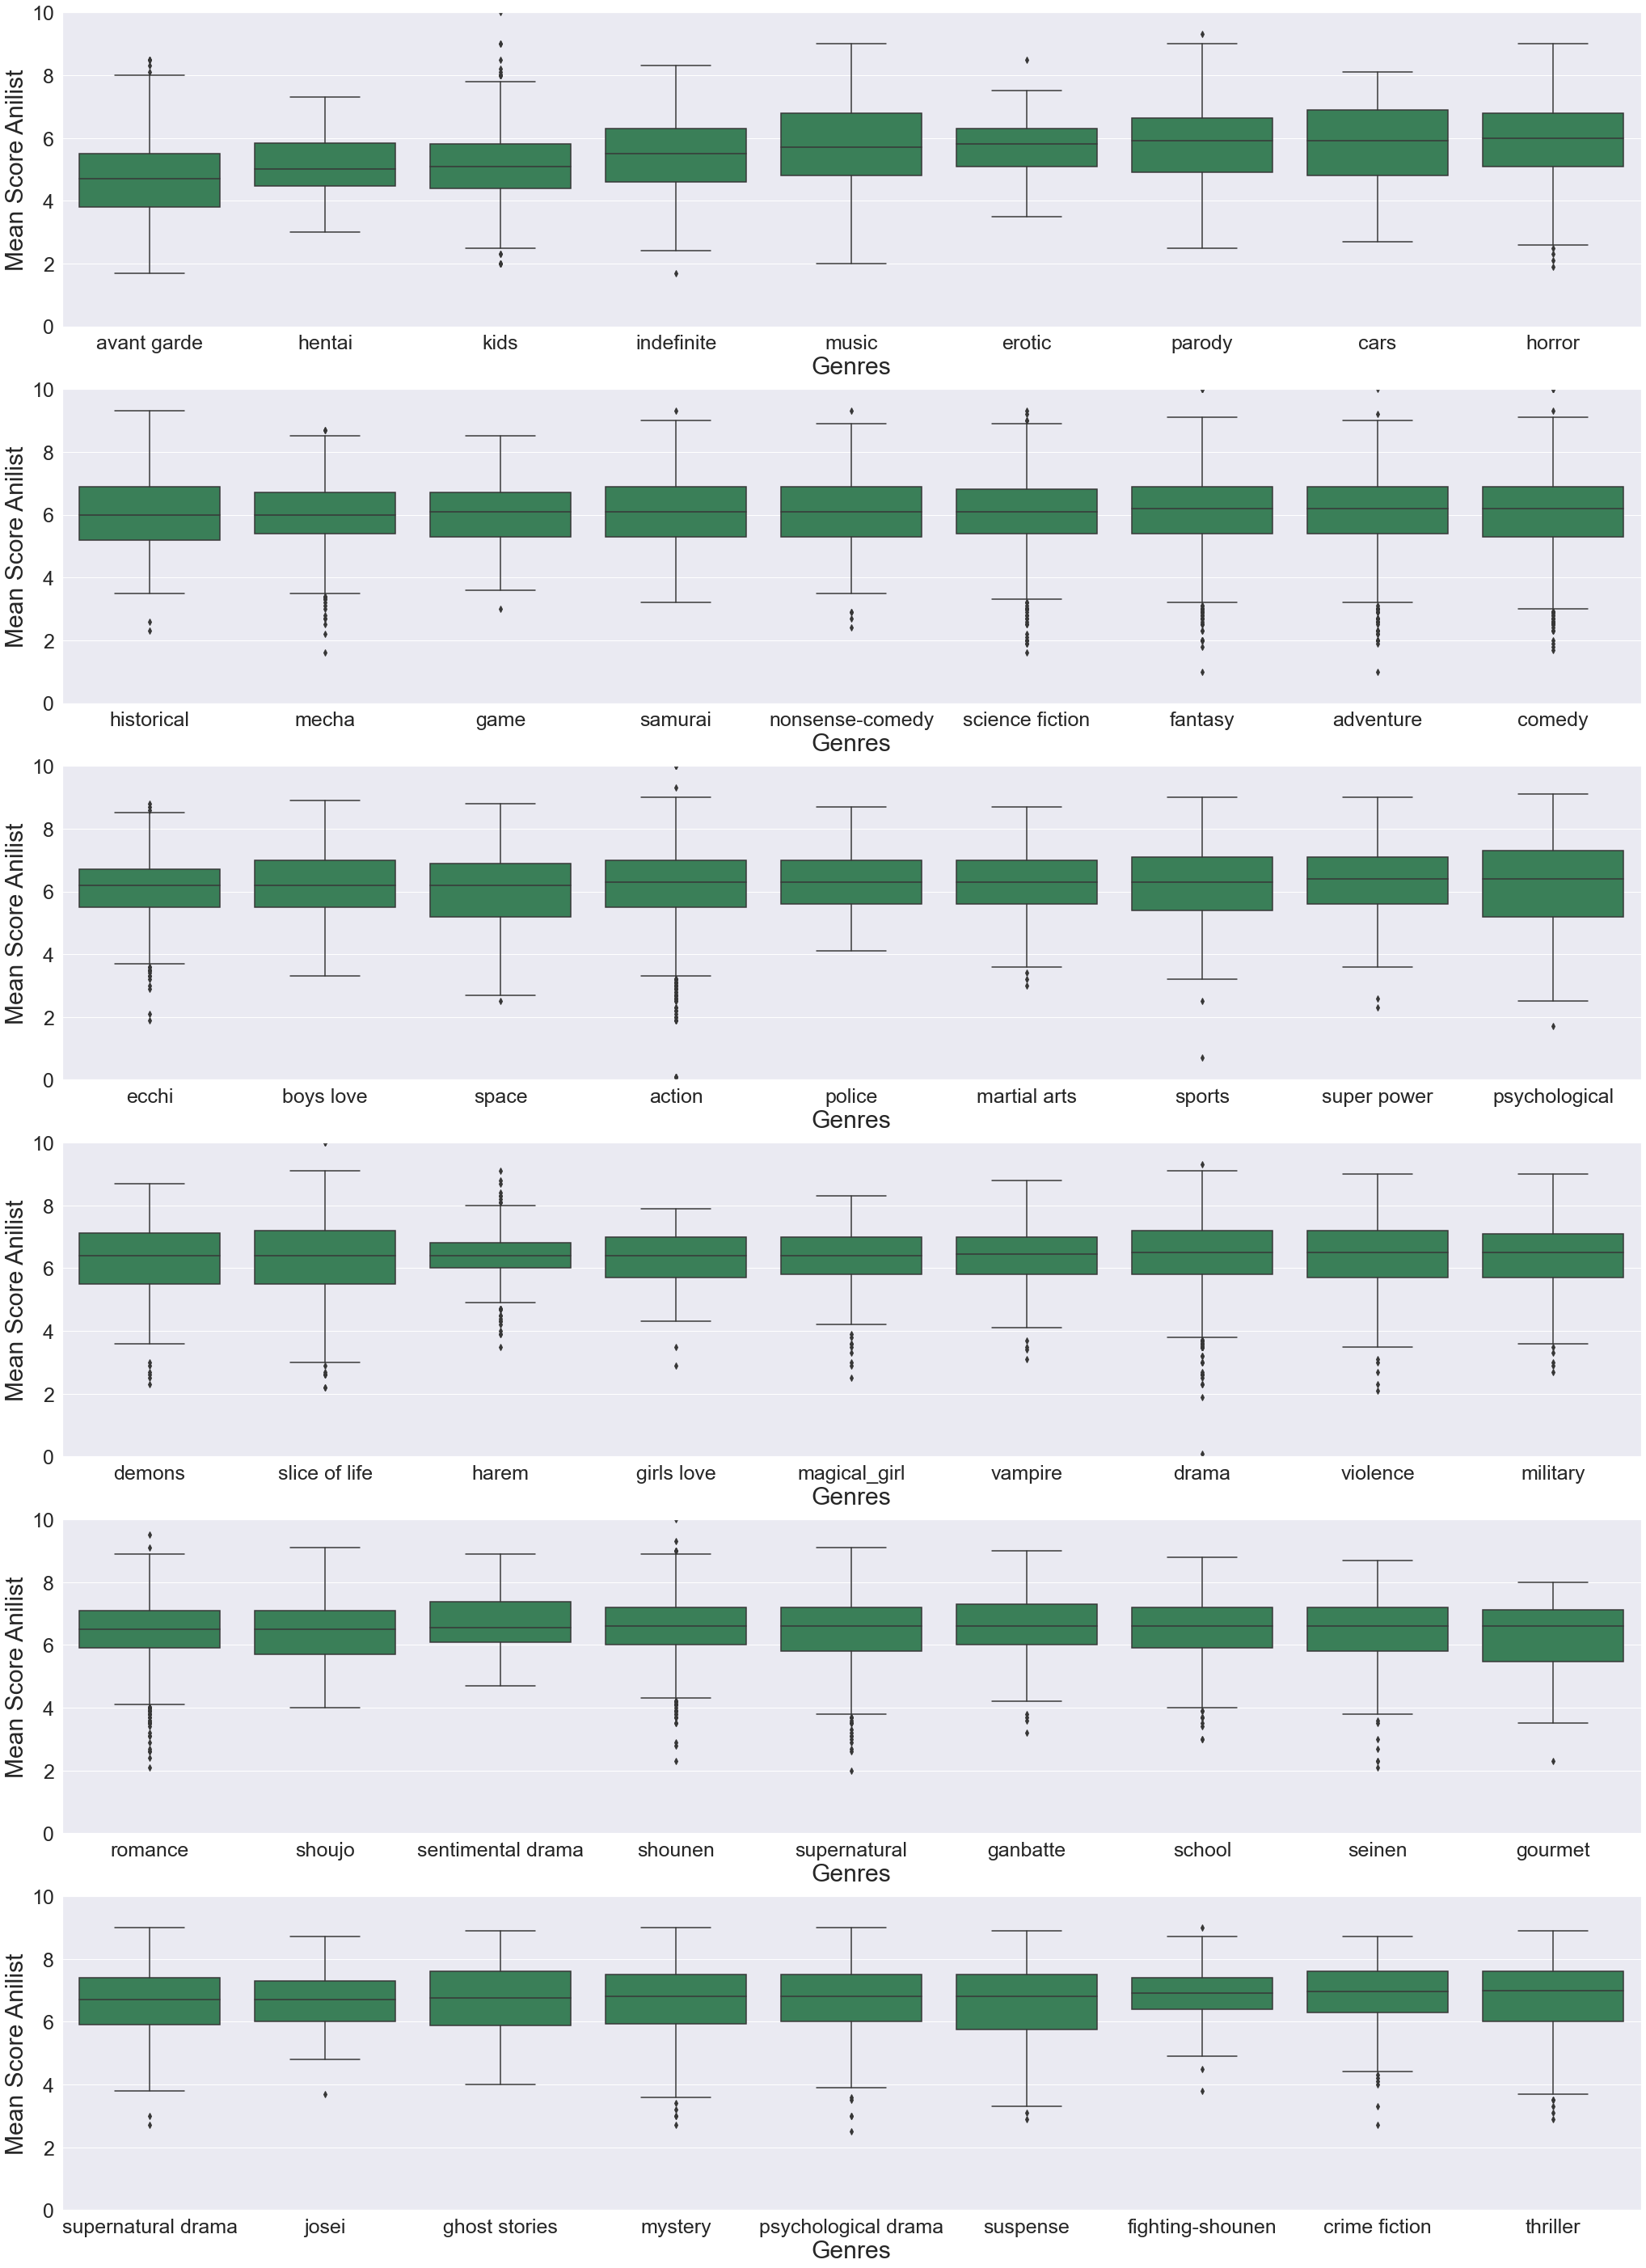

In [58]:
box_plot_genres_score("anilist", genres_anilist, color="seagreen")

In [59]:
def median_score_by_genre_kitsu(genre):
    return result[result[genre] == 1]["mean_score_kitsu"].median()

In [60]:
genres_kitsu = sorted(genres, key=median_score_by_genre_kitsu)

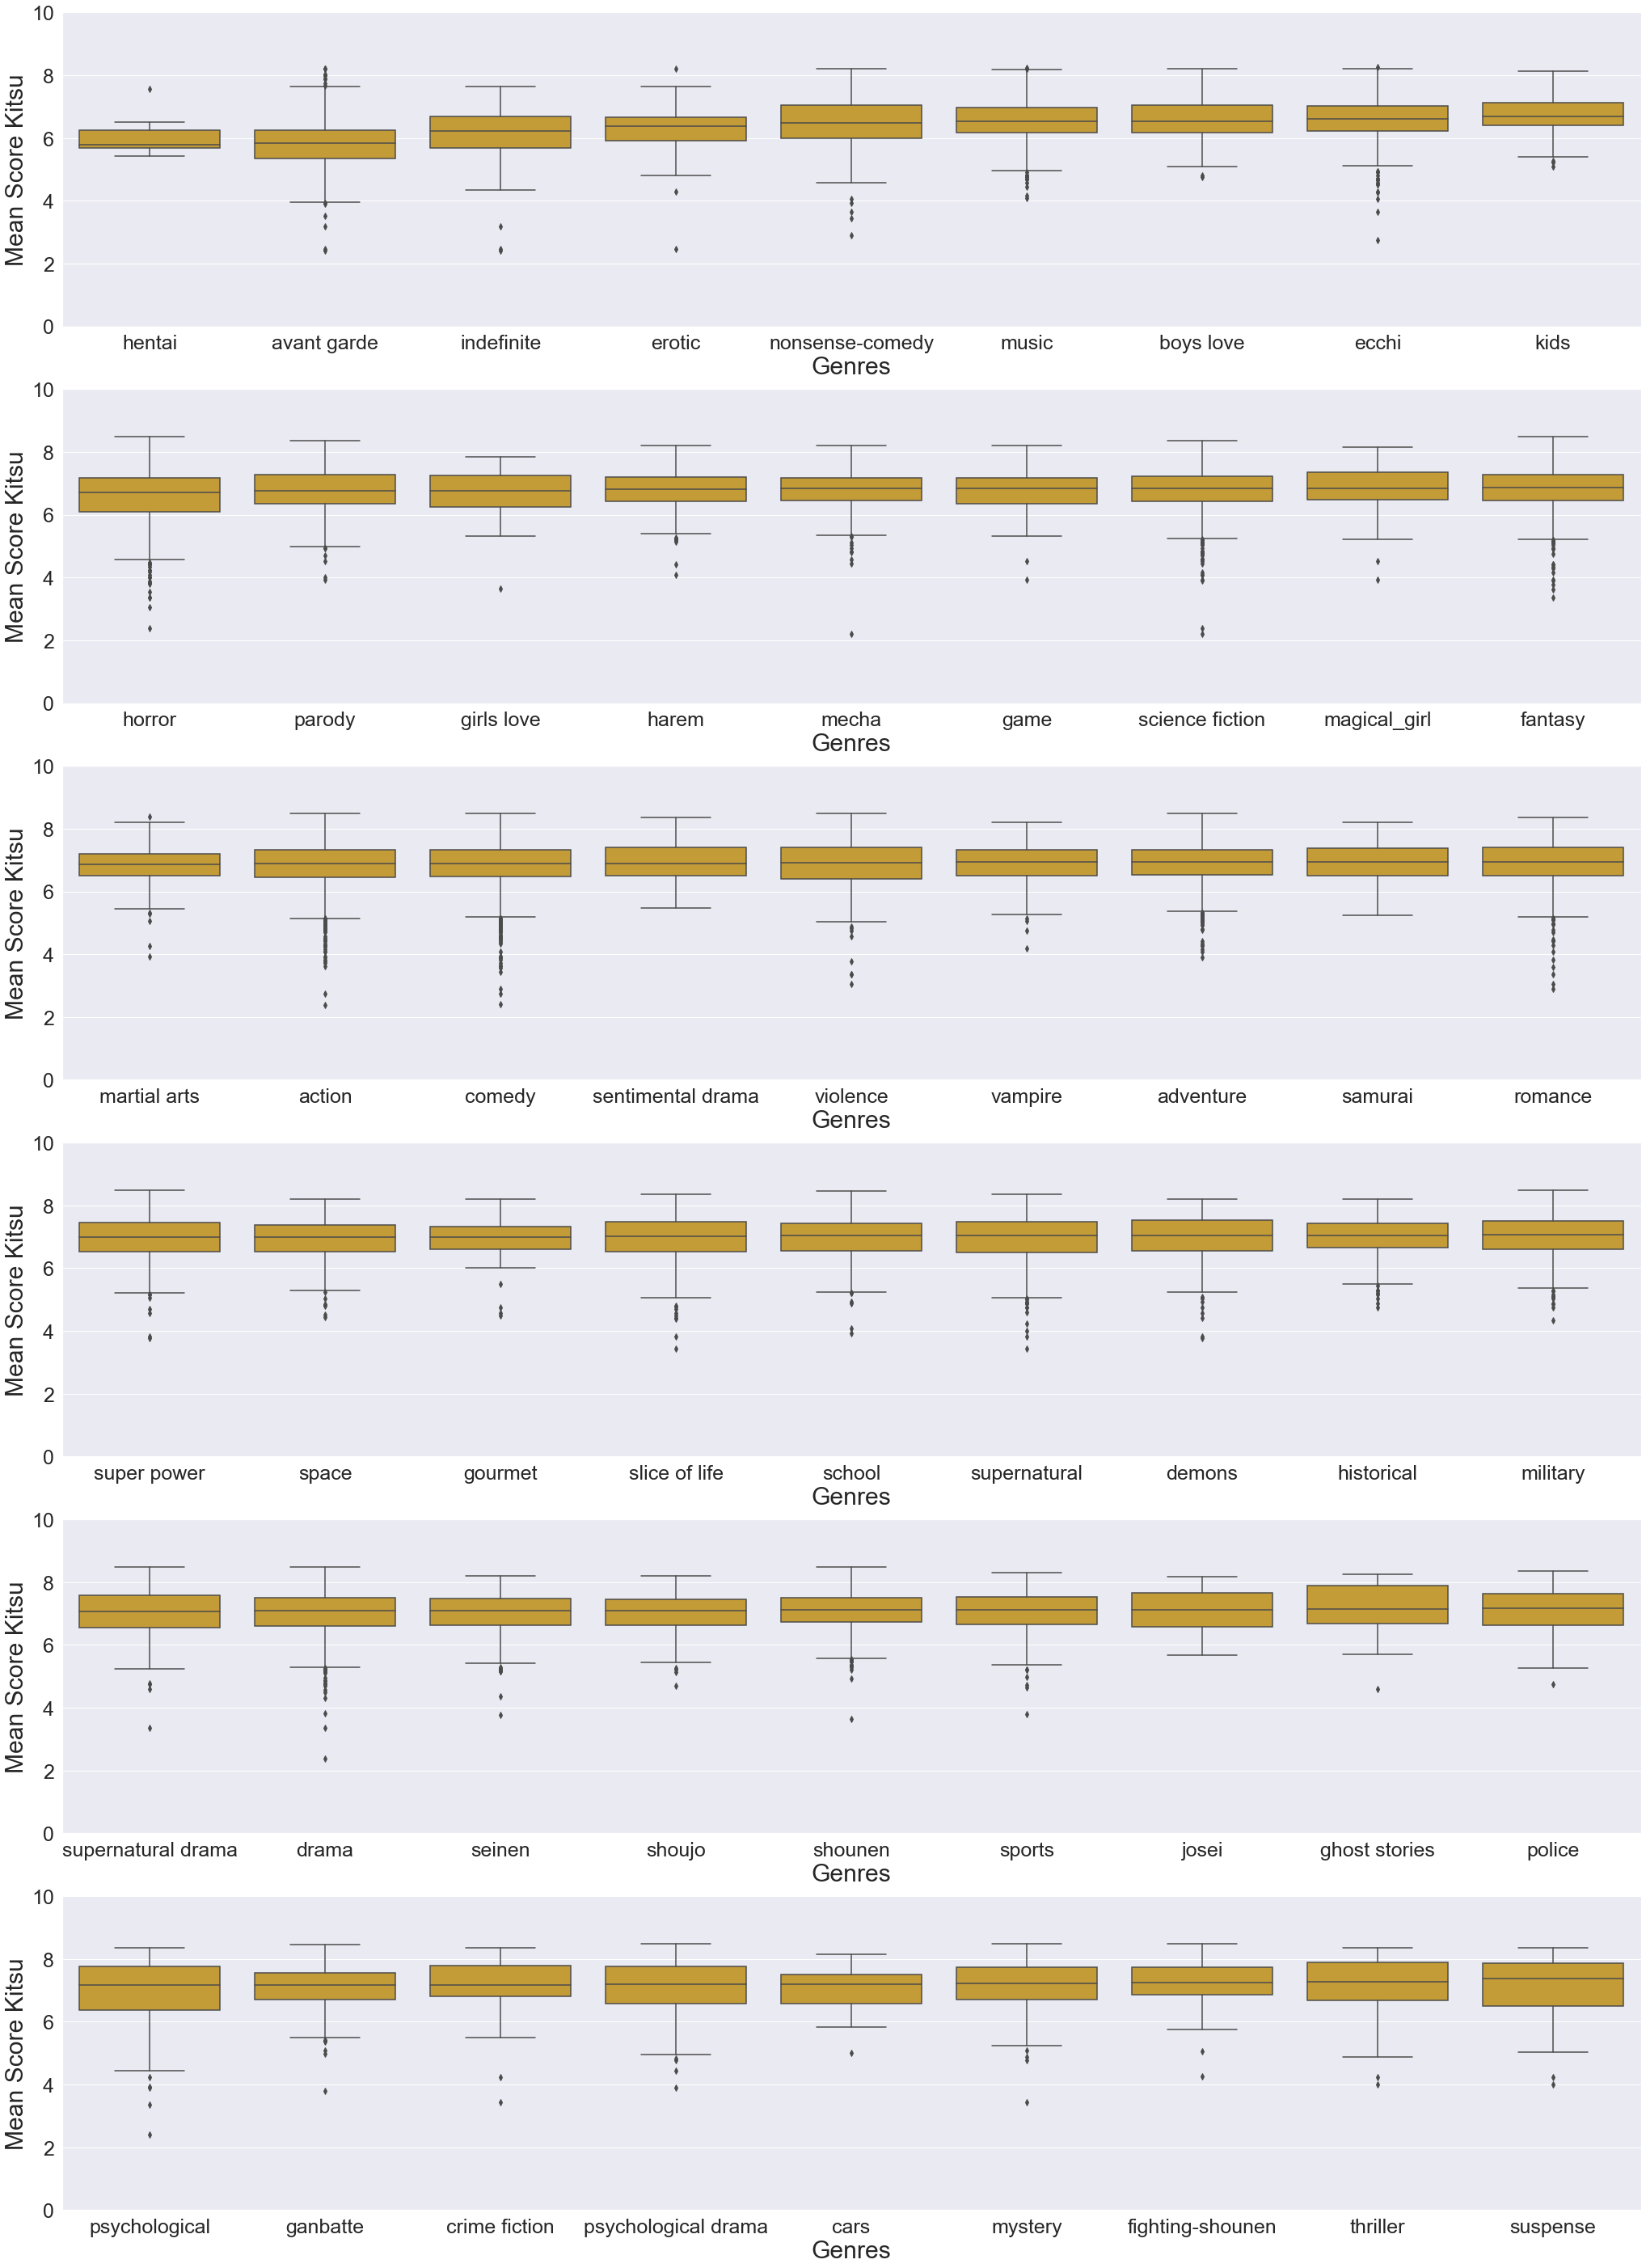

In [61]:
box_plot_genres_score("kitsu", genres_kitsu, color="goldenrod")

In [62]:
def median_score_by_genre_anisearch(genre):
    return result[result[genre] == 1]["mean_score_anisearch"].median()

In [63]:
genres_anisearch = sorted(genres, key=median_score_by_genre_anisearch)

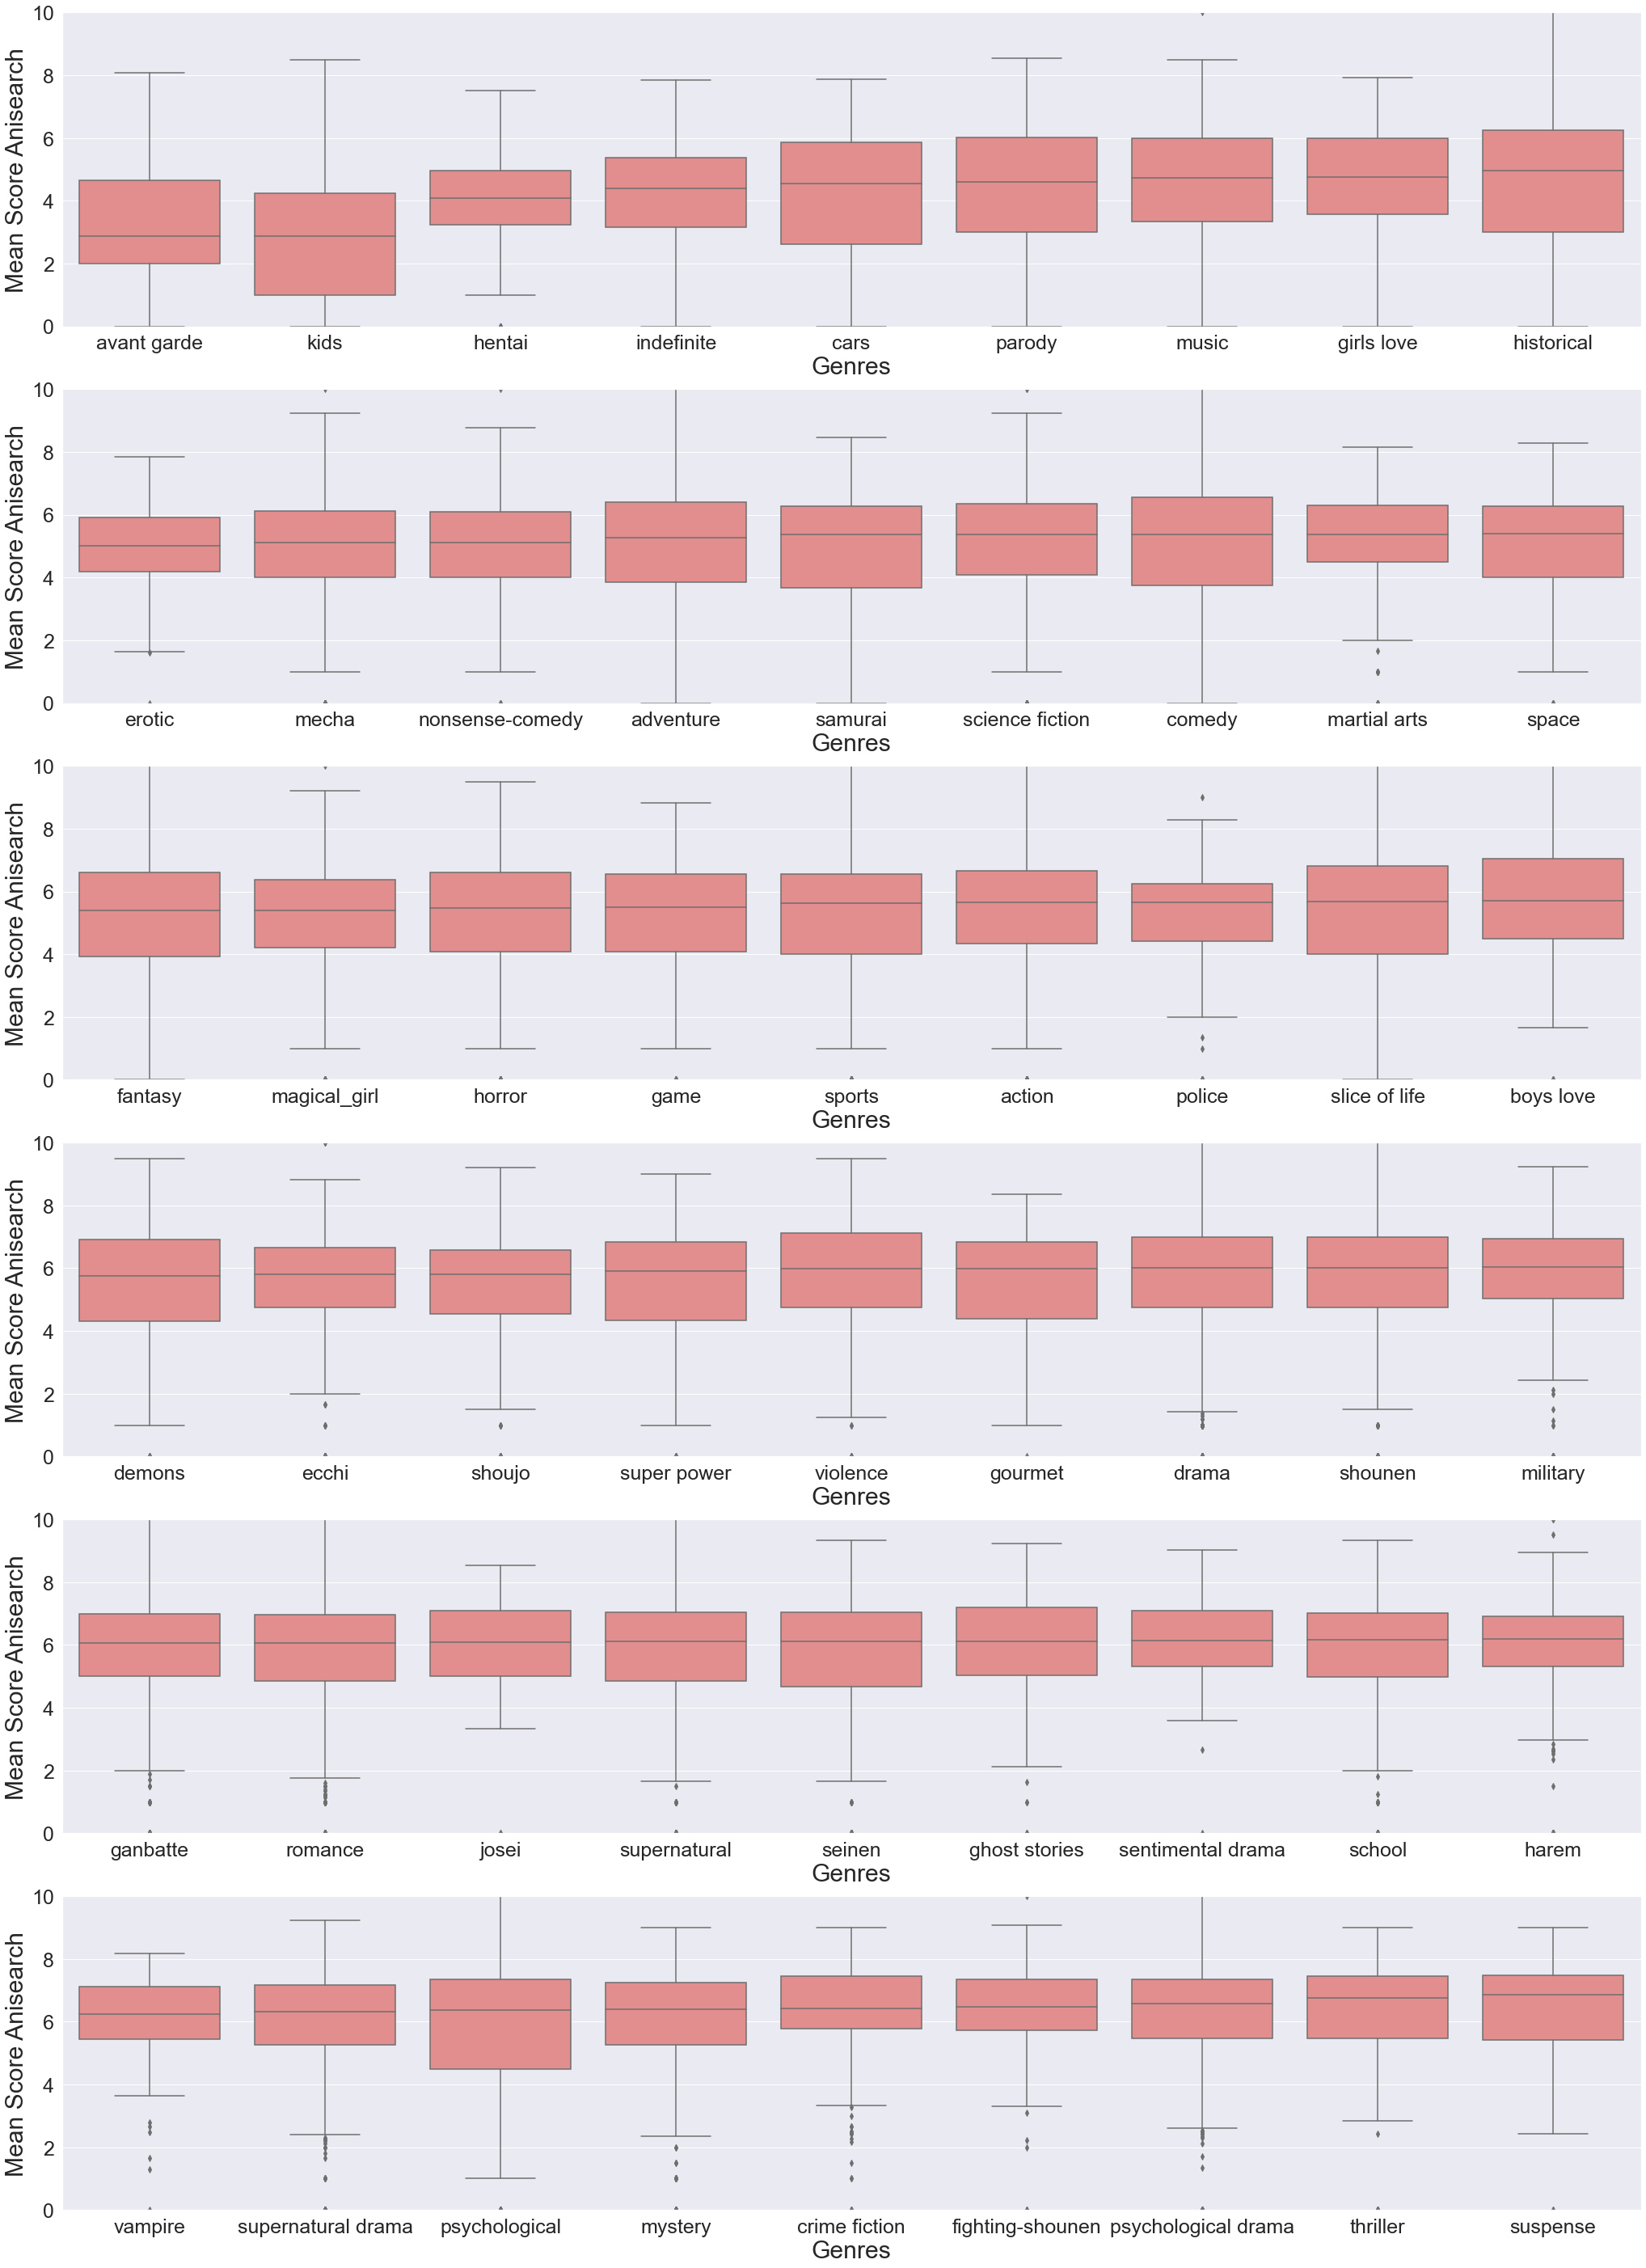

In [64]:
box_plot_genres_score("anisearch", genres_anisearch, color="lightcoral")

### Media type

In [65]:
anime_media_type = pd.read_csv("../data/csv/title_single_valued_attrs.csv")

d:\ComputerScience\BachKhoa\IntroDataScience\Anime-Analysis\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
anime_media_type.head()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,...,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,shingeki no kyojin,attack on titan,0.85,0.85,500176.0,46026.0,24.0,finished,25.0,...,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,death note,death note,0.84,0.84,454179.0,34209.0,23.0,finished,37.0,...,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,boku no hero academia,my hero academia,0.79,0.79,452700.0,23439.0,24.0,finished,13.0,...,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,kimetsu no yaiba,demon slayer: kimetsu no yaiba,0.85,0.85,444903.0,38842.0,24.0,finished,26.0,...,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,hunter×hunter (2011),hunter x hunter (2011),0.90,0.90,415793.0,54890.0,24.0,finished,148.0,...,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


In [67]:
anime_media_type.columns

Index(['title', 'romaji_title', 'english_title', 'mean_score_anilist',
       'weighted_score_anilist', 'popularity_anilist', 'favorites_anilist',
       'duration', 'status', 'episodes', 'source', 'season_season',
       'season_year', 'media_type', 'anilist_url', 'creator', 'prequel',
       'sequel', 'directors', 'status_completed_anilist',
       'status_planning_anilist', 'status_current_anilist',
       'status_paused_anilist', 'status_dropped_anilist', 'start_date',
       'end_date', 'mean_score_anisearch', 'popularity_anisearch',
       'favorites_anisearch', 'status_completed_anisearch',
       'status_planning_anisearch', 'status_current_anisearch',
       'status_paused_anisearch', 'status_dropped_anisearch',
       'number_scorer_anisearch', 'url', 'age', 'mean_score_kitsu',
       'favorite_count_kitsu', 'rating_rank_kitsu', 'user_count_kitsu',
       'mean_score_mal', 'popularity_mal', 'number_scorer_mal',
       'favorites_mal'],
      dtype='object')

In [68]:
anime_media_type.loc[:, "mean_score_anilist"] = anime_media_type["mean_score_anilist"].apply(lambda x: x*10)

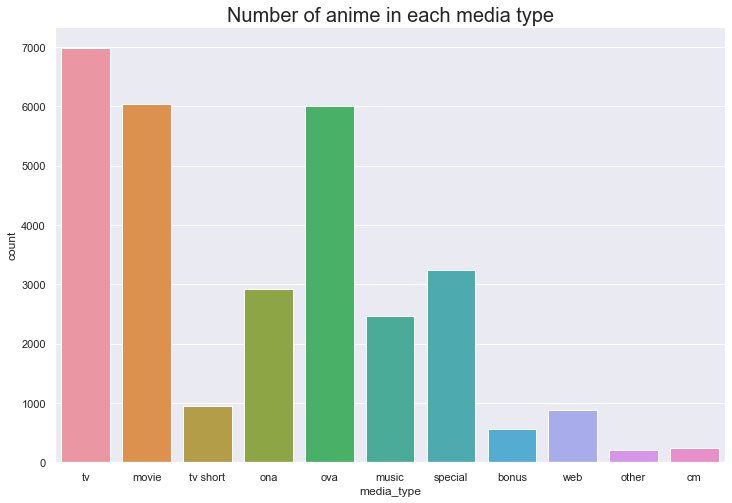

In [70]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="media_type", ax=ax, orient="v", data=anime_media_type)
plt.title("Number of anime in each media type", fontsize=20)
filename = "Plots/num_anime_per_media_type.png"
plt.savefig(filename)

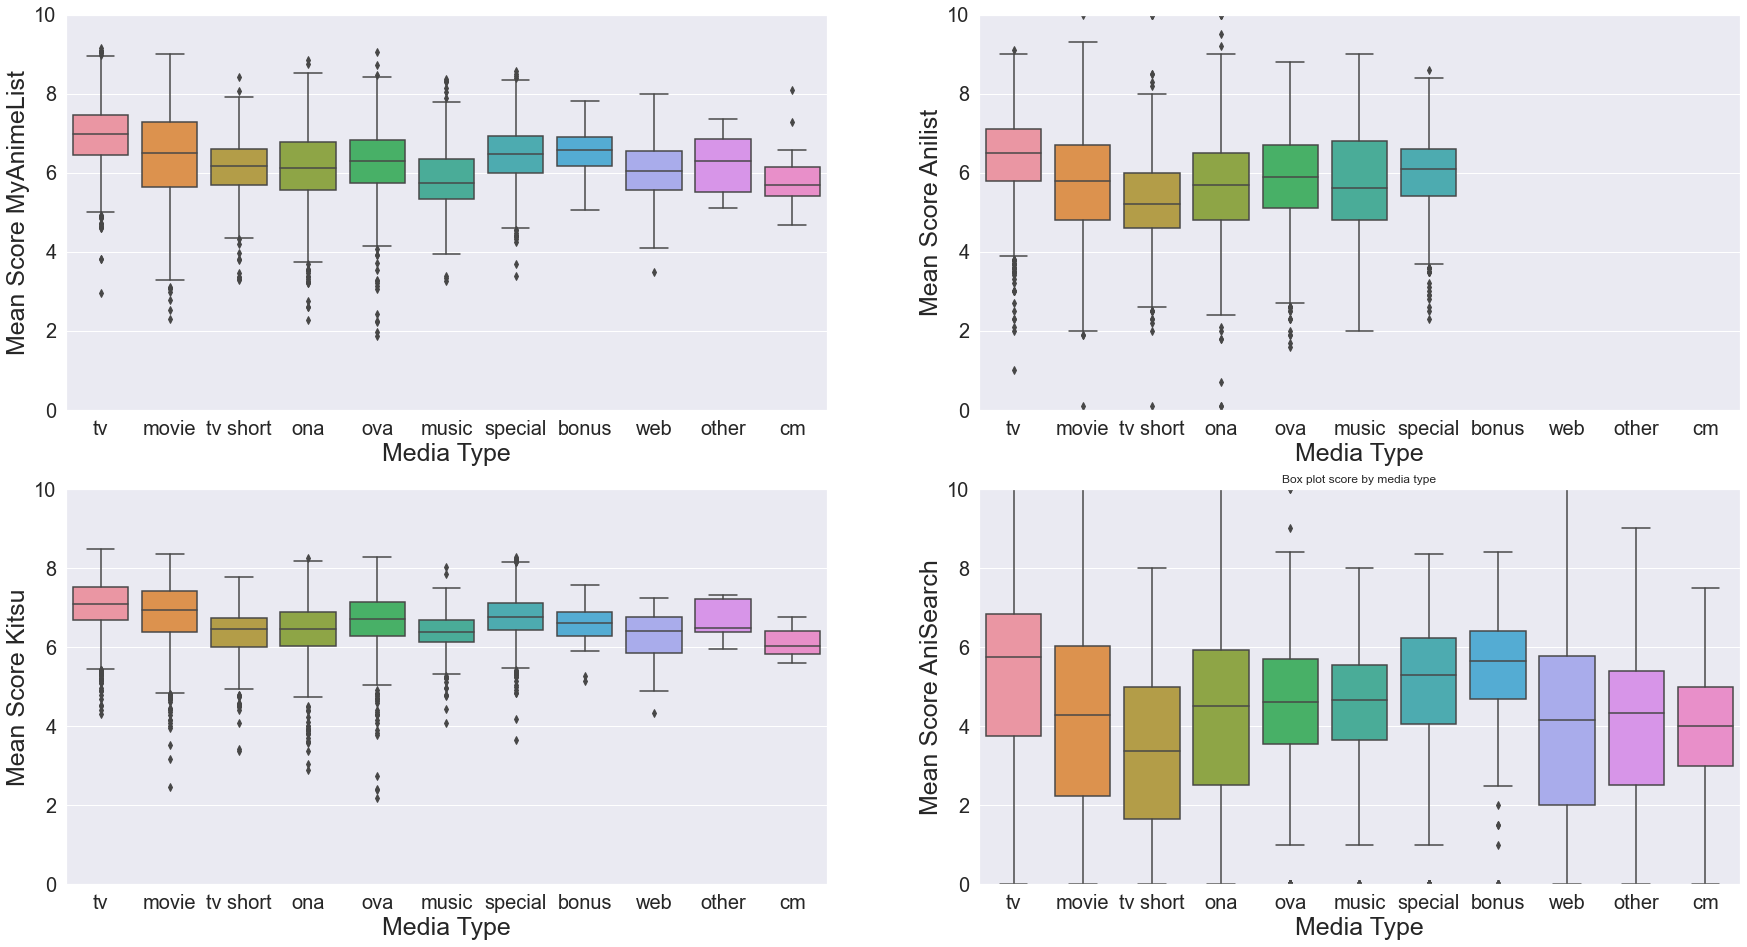

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 16))
sns.boxplot(x=anime_media_type["media_type"], ax=axs[0][0], y=anime_media_type["mean_score_mal"])
sns.boxplot(x=anime_media_type["media_type"], ax=axs[0][1], y=anime_media_type["mean_score_anilist"])
sns.boxplot(x=anime_media_type["media_type"], ax=axs[1][0], y=anime_media_type["mean_score_kitsu"])
sns.boxplot(x=anime_media_type["media_type"], ax=axs[1][1], y=anime_media_type["mean_score_anisearch"])

websites = ["MyAnimeList", "Anilist", "Kitsu", "AniSearch"]
for ax, website in zip(axs.flat, websites):
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.set_xlabel("Media Type", fontsize=25)
    ax.set_ylabel("Mean Score " + website, fontsize=25)
    ax.set_ylim(0, 10)
plt.title("Box plot score by media type")
filename = "Plots/box_plot_score_by_media_type.png"
plt.savefig(filename)

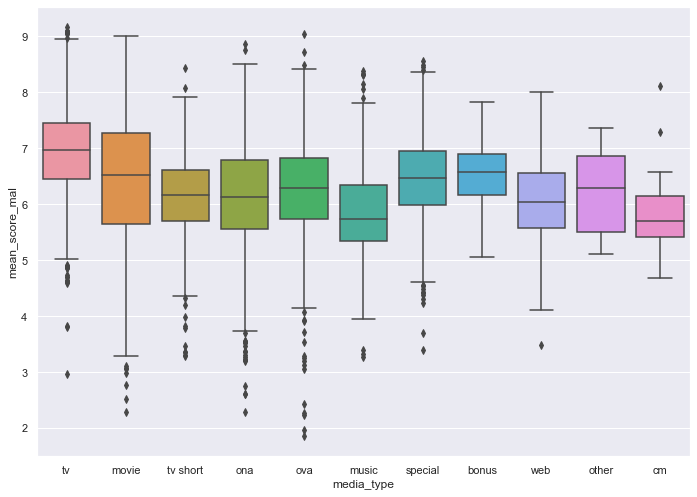

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=anime_media_type["media_type"], y=anime_media_type["mean_score_mal"])
filename = "Plots/boxplot_score_mal_by_media_type"
plt.savefig(filename)

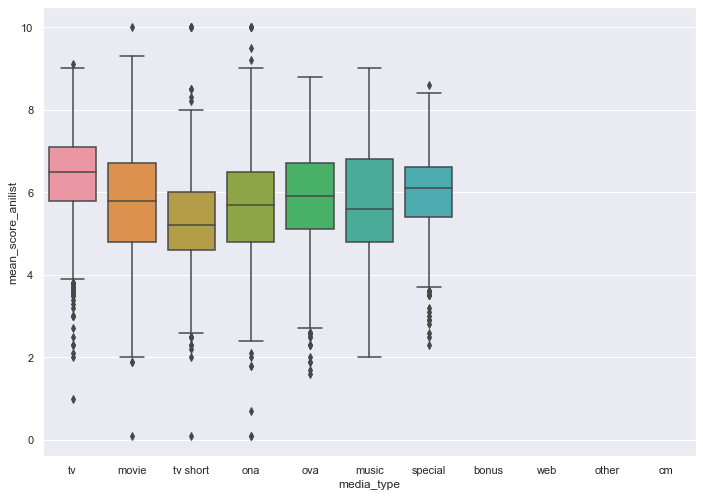

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=anime_media_type["media_type"], y=anime_media_type["mean_score_anilist"])
filename = "Plots/boxplot_score_anilist_by_media_type"
plt.savefig(filename)

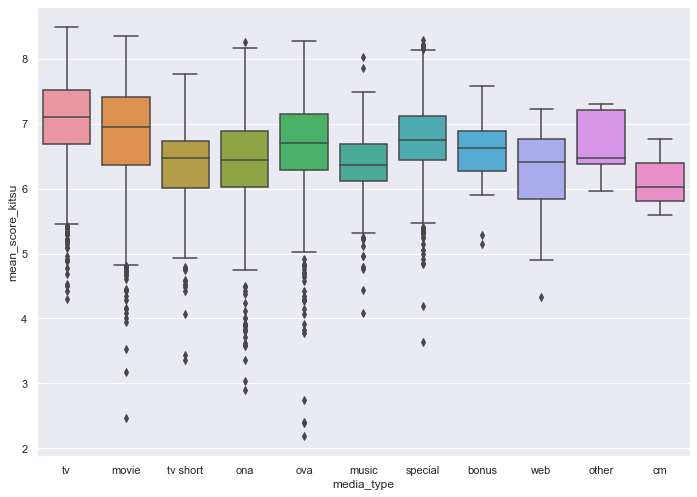

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=anime_media_type["media_type"], y=anime_media_type["mean_score_kitsu"])
filename = "Plots/boxplot_score_kitsu_by_media_type"
plt.savefig(filename)

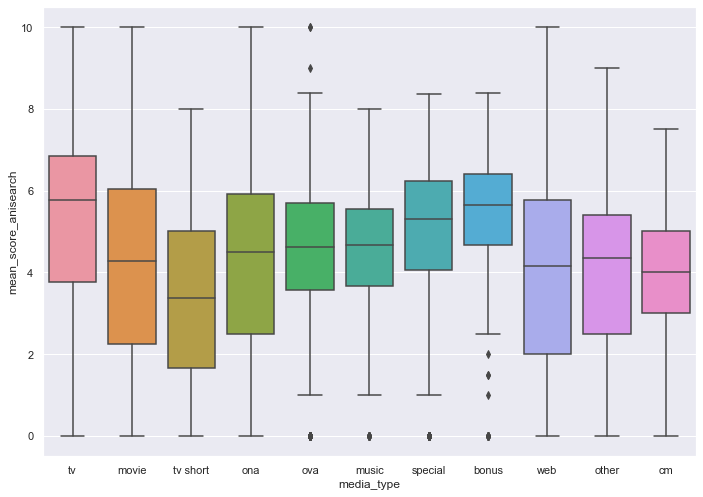

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=anime_media_type["media_type"], y=anime_media_type["mean_score_anisearch"])
filename = "Plots/boxplot_score_anisearch_by_media_type"
plt.savefig(filename)